In [1]:
import pandas as pd

In [2]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Obtener datos
url = 'https://www.juntadeandalucia.es/institutodeestadisticaycartografia/badea/stpivot/stpivot/Print?cube=85977e77-d23f-479e-aa98-72c5c6f3808f&type=3&foto=si&ejecutaDesde=&codConsulta=38228&consTipoVisua=JP'
fields = ['Fecha', 'Territorio', 'Medida', 'Valor']
df = pd.read_csv(url, delimiter=';', usecols=fields)

In [4]:
# Convertir fecha
df['Fecha'] = pd.to_datetime(df.Fecha, dayfirst=True)

In [5]:
# Obtener la última fecha
last_fecha = df['Fecha'].max()

In [6]:
# Ordenar los datos
df.sort_values(by=['Territorio', 'Medida', 'Fecha'], inplace=True)

In [7]:
# Calcular el porcentaje de cambio con respecto al día anterior
df['pctChange'] = df.groupby(['Territorio', 'Medida'])['Valor'].pct_change()*100

In [8]:
# Organizar los datos en modo tabla
dfV = df.pivot_table(values='pctChange', index=['Territorio', 'Fecha'], columns='Medida')
dfV.tail(1)

,Medida,Confirmados,Curados,Fallecimientos,Hospitalizados,Nuevos casos,Total UCI
Territorio,Fecha,,,,,,
Sevilla,2020-04-15,2.964335,22.93578,3.846154,1.01833,-15.789474,1.470588


In [9]:
dfG_columns = ['Hospitalizados', 'Total UCI', 'Fallecimientos']

In [10]:
# Datos de un día para el gráfico usando df.xs
dfG = dfV.xs(last_fecha, level='Fecha')

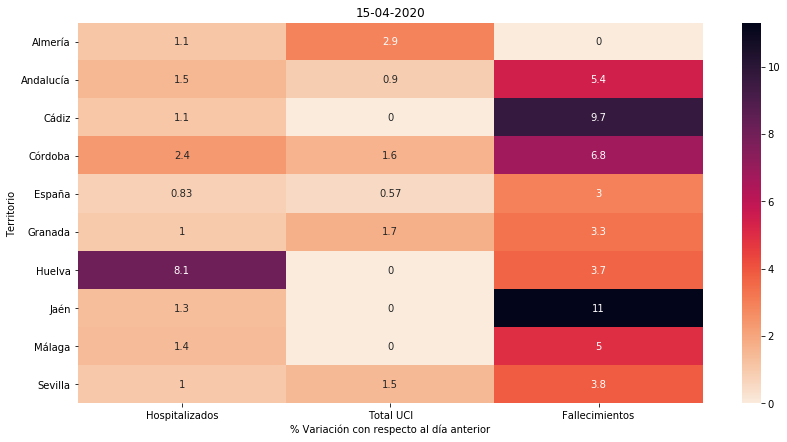

In [11]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title(last_fecha.strftime('%d-%m-%Y'))

# Invertir los colores
cmap = sns.cm.rocket_r

# Heatmap 
sns.heatmap(data=dfG[dfG_columns], annot=True, cmap=cmap)

# Add label for horizontal axis
plt.xlabel('% Variación con respecto al día anterior')
plt.show()

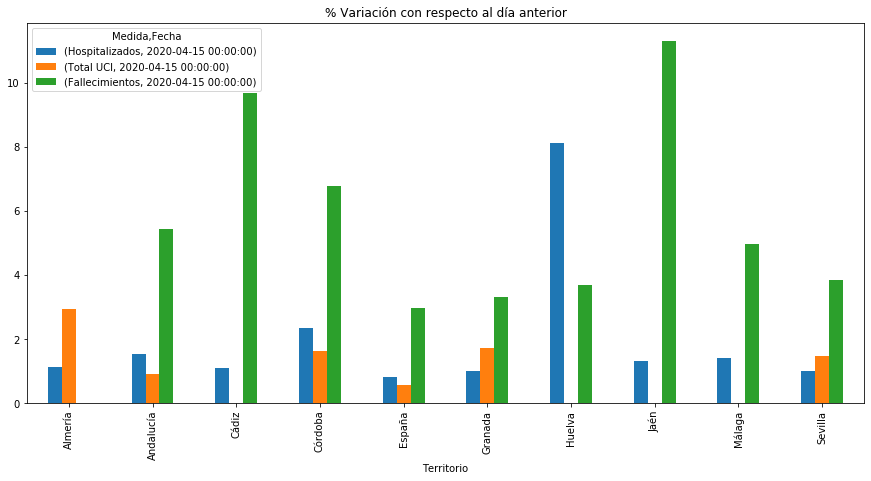

In [18]:
# Datos de un día para el gráfico usando groupby y tail
dfG = dfV.groupby(level='Territorio').tail(1)[dfG_columns].unstack()

# plot data
fig, ax = plt.subplots(figsize=(15,7))
dfG.plot(kind='bar', ax=ax)
plt.title('% Variación con respecto al día anterior')
plt.show()

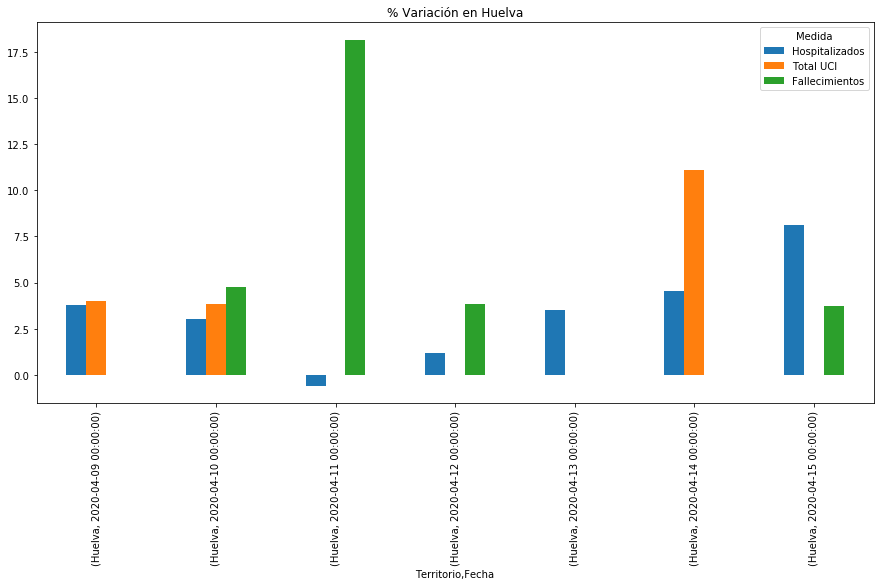

In [13]:
# Datos de los últimos x días para una lista de territorios
dias = 7
fTerr = ['Huelva']
fFecha = pd.date_range(end=last_fecha, periods=dias)
dfG = dfV.iloc[dfV.index.isin(fTerr, level='Territorio') &
                 dfV.index.isin(fFecha, level='Fecha')][dfG_columns]
# plot data
fig, ax = plt.subplots(figsize=(15,7))
dfG.plot(kind='bar', ax=ax, title='% Variación en ' + fTerr[0])
plt.show()

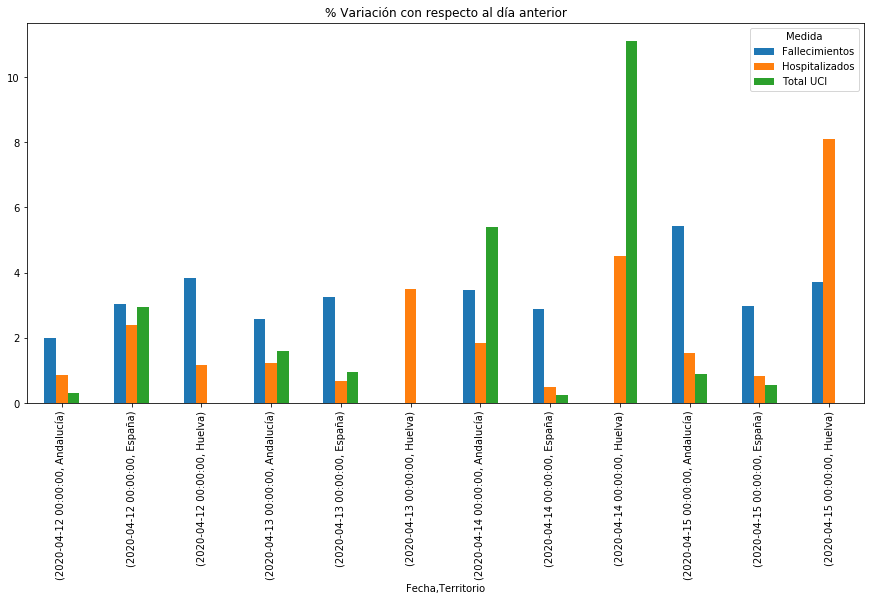

In [14]:
dias = 4
fTerr = ['España', 'Andalucía', 'Huelva']
fFecha = pd.date_range(end=last_fecha, periods=dias)
filtro = df['Territorio'].isin(fTerr) & df['Fecha'].isin(fFecha) & df['Medida'].isin(dfG_columns)
dfG = df[filtro].pivot_table(values='pctChange', index=['Fecha', 'Territorio'], columns='Medida')
# plot data
fig, ax = plt.subplots(figsize=(15,7))
dfG.plot(kind='bar', ax=ax, title='% Variación con respecto al día anterior')
plt.show()

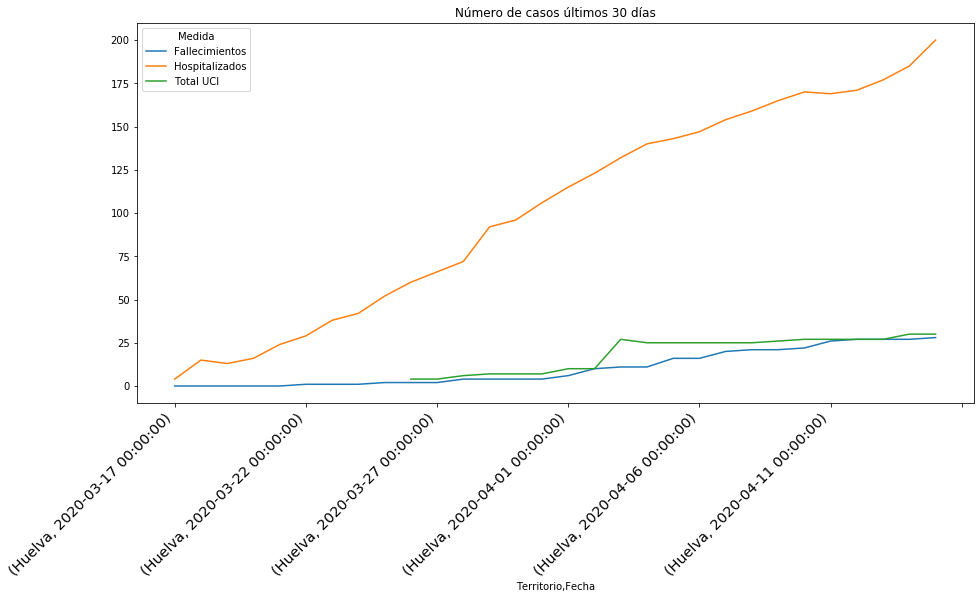

In [15]:
# Últimos 30 días filtrando por campos, no por índices
dias = 30
fTerr = ['Huelva']
fFecha = pd.date_range(end=last_fecha, periods=dias)
filtro = df['Territorio'].isin(fTerr) & df['Fecha'].isin(fFecha) & df['Medida'].isin(dfG_columns)
dfG = df[filtro].pivot_table(values='Valor', index=['Territorio', 'Fecha'], columns='Medida')
# plot data
fig, ax = plt.subplots(figsize=(15,7))
dfG.plot(ax=ax, title='Número de casos últimos ' + str(dias) + ' días')
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()